## this is a cleaning project using data from a Star Wars survey
### the original data set is available at https://github.com/fivethirtyeight/data/tree/master/star-wars-survey

In [1]:
import pandas as pd
star_wars = pd.read_csv('StarWars.csv', encoding="ISO-8859-1")

In [2]:
star_wars.columns

Index([                                                                                                                                 u'RespondentID',
                                                                                        u'Have you seen any of the 6 films in the Star Wars franchise?',
                                                                               u'Do you consider yourself to be a fan of the Star Wars film franchise?',
                                                                 u'Which of the following Star Wars films have you seen? Please select all that apply.',
                                                                                                                                          u'Unnamed: 4',
                                                                                                                                          u'Unnamed: 5',
                                                                                  

In [3]:

star_wars.head(10)


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire St

### step one: 
### * remove any rows where the anonymized respondent ID is NaN
### * change string responses to booleans so i can avoid string comparisons

In [4]:
star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]

to_boolean = {"Yes": True, "No": False}

for col in [
    "Have you seen any of the 6 films in the Star Wars franchise?",
    "Do you consider yourself to be a fan of the Star Wars film franchise?"
    ]:
    # use .loc[] method to map this w/o settingcopywarning 
    star_wars[col] = star_wars[col].map(to_boolean)
    


star_wars.head()
    
  

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3292879998,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3292879538,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3292765271,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3292763116,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292731220,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### next:
### * clean up and rename columns for films seen

In [5]:
import numpy as np

star_wars = star_wars.rename(columns={
        'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_ep1',
        'Unnamed: 4': 'seen_ep2',
        'Unnamed: 5': 'seen_ep3',
        'Unnamed: 6': 'seen_ep4',
        'Unnamed: 7': 'seen_ep5',
        'Unnamed: 8': 'seen_ep6'
    })

movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.nan: False,
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)

# now to take a look
star_wars.head(20)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_ep1,seen_ep2,seen_ep3,seen_ep4,seen_ep5,seen_ep6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3292879998,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3292765271,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3292763116,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292731220,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3292719380,True,True,True,True,True,True,True,True,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3292684787,True,True,True,True,True,True,True,True,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3292663732,True,True,True,True,True,True,True,True,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3292654043,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
10,3292640424,True,False,False,True,False,False,False,False,1,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific


## Ranking Favorites
#### there's one column for each movie, and participants were asked to assign a number 1-6 to each movie to indicate where they thought it ranked, with 1 being the best

In [6]:
# converts data in the selected columns to floats for easy math manipulation
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

# rename columns to something more intuitive
star_wars = star_wars.rename(columns={
        'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ep1_rank',
        'Unnamed: 10': 'ep2_rank',
        'Unnamed: 11': 'ep3_rank',
        'Unnamed: 12': 'ep4_rank',
        'Unnamed: 13': 'ep5_rank',
        'Unnamed: 14': 'ep6_rank'
    })

In [7]:
# to find out which movie ranked the best, we'll take the mean of each column
# lower number means better ranking
star_wars[star_wars.columns[9:15]].mean()

ep1_rank    3.732934
ep2_rank    4.087321
ep3_rank    4.341317
ep4_rank    3.272727
ep5_rank    2.513158
ep6_rank    3.047847
dtype: float64

<Container object of 6 artists>

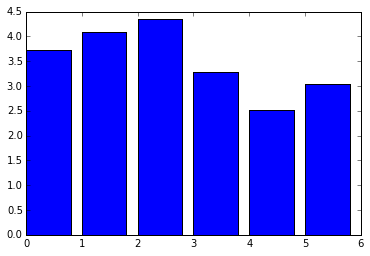

In [8]:
# make a bar chart
import matplotlib.pyplot as plt
%matplotlib inline 

plt.bar(range(6), star_wars[star_wars.columns[9:15]].mean())

### Rankings: Comparisons
### so we can see here that the original movies ranked better overall than the newer films. the lowest ranked movie was episode 3, while the highest ranked movie was episode 5, _the empire strikes back_. this is pretty much inline with what one usually hears about the franchise.

### comsumption is another metric of how well-liked a film is. so i'm going to see which films have been seen the most, and see if there's any correlation 

## note: i feel like there should be a more intuitive way to display this, need to go over plotting mission and find out what that is.

In [9]:
star_wars[star_wars.columns[3:9]].sum()

seen_ep1    673
seen_ep2    571
seen_ep3    550
seen_ep4    607
seen_ep5    758
seen_ep6    738
dtype: int64

<Container object of 6 artists>

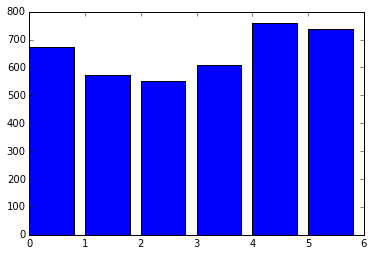

In [10]:
plt.bar(range(6), star_wars[star_wars.columns[3:9]].sum())

### i can see that  _episode 3_, the least favorite in the rankings, is also (unsuprisingly) the least viewed. and the favorite--_episode 5_--is the one the most people have seen.
### i'm curious to know whether this breaks down any differently along gender lines

In [11]:
# break down binary columns into new dataframes

females = star_wars[star_wars['Gender'] == 'Female']
males = star_wars[star_wars['Gender'] == 'Male']

In [12]:
females[females.columns[3:9]].sum()

seen_ep1    298
seen_ep2    237
seen_ep3    222
seen_ep4    255
seen_ep5    353
seen_ep6    338
dtype: int64

<Container object of 6 artists>

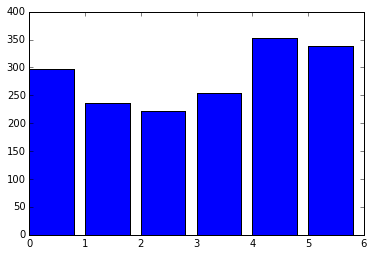

In [14]:
%matplotlib inline
plt.bar(range(6), females[females.columns[3:9]].sum())

In [15]:
males[males.columns[3:9]].sum()

seen_ep1    361
seen_ep2    323
seen_ep3    317
seen_ep4    342
seen_ep5    392
seen_ep6    387
dtype: int64

<Container object of 6 artists>

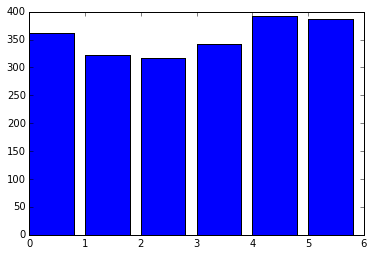

In [16]:
plt.bar(range(6), males[males.columns[3:9]].sum())

### in general, people who identify as male are more likely to have seen the _star wars_ movies than those who identify as female
### next look: preferences

In [17]:
females[females.columns[9:15]].mean()

ep1_rank    3.429293
ep2_rank    3.954660
ep3_rank    4.418136
ep4_rank    3.544081
ep5_rank    2.569270
ep6_rank    3.078086
dtype: float64

<Container object of 6 artists>

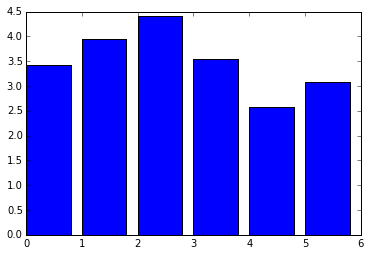

In [18]:
plt.bar(range(6), females[females.columns[9:15]].mean())

In [19]:
males[males.columns[9:15]].mean()

ep1_rank    4.037825
ep2_rank    4.224586
ep3_rank    4.274882
ep4_rank    2.997636
ep5_rank    2.458629
ep6_rank    3.002364
dtype: float64

<Container object of 6 artists>

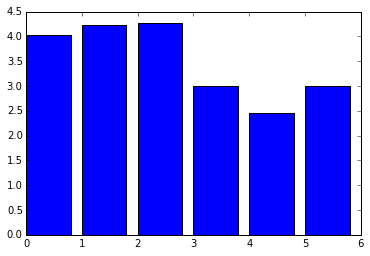

In [20]:
plt.bar(range(6), males[males.columns[9:15]].mean())

### so it looks like female respondents were kinder to _episode 1_ and _episode 2_ than male respondents. but what everyone can agree on (apparently) is that _episode 5_ is the most liked movie, and _episode 3_ is the least.